In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
import cv2
import pause

In [2]:
# Capture a screenshot of the device's screen and pull the captured screenshot from the device to the local machine
os.system('adb shell screencap -p /sdcard/screencap.png')
os.system('adb pull /sdcard/screencap.png')

0

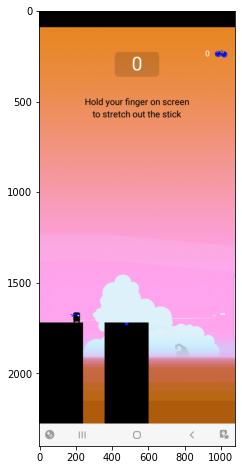

In [3]:
# Read the image using OpenCV
img = cv2.imread('screencap.png')
screen_height, screen_width, _ = img.shape

# Set the size of the displayed plot using Matplotlib
plt.rcParams["figure.figsize"] = [15,8]
plt.imshow(img)

# Convert the color space of the image from BGR (OpenCV's default) to RGB for proper display with Matplotlib
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

In [4]:
# Get the dimensions of the image and normalise the height and width
yf, xf, zf = np.shape(img)
yf = yf/2280
xf = xf/1080

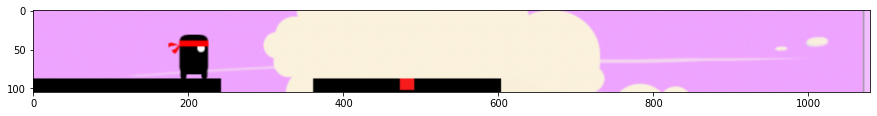

In [5]:
# Crop the image based on specified y-axis (vertical) coordinates and retain all columns
img_crop = img[int(np.floor(1550*yf)):int(np.floor(1650*yf)), :]
plt.imshow(img_crop)
y_crop, x_crop, z_crop = np.shape(img_crop)

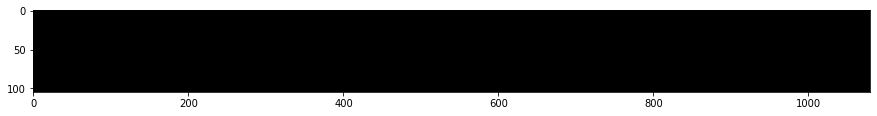

In [6]:
# Set all the RGB values to ZERO giving black color   """ 
my_img = np.zeros_like(img_crop)
plt.imshow(my_img)

In [7]:
rcord=set()

# Iterate over each pixel in the cropped image
for j in range(y_crop):
    for k in range(x_crop):
        # Check if the pixel color matches either red (255, 0, 0) or a similar shade
        if(((img_crop[j,k,0]==255) and (img_crop[j,k,1]==0) and (img_crop[j,k,2]==0)) or ((img_crop[j,k,0]==247) and (img_crop[j,k,1]==27) and (img_crop[j,k,2]==27))):
            # Set the corresponding pixel in the new image to green (0, 255, 0)
            my_img[j,k,0] = 0
            my_img[j,k,1] = 255
            my_img[j,k,2] = 0
            rcord.add(k)  

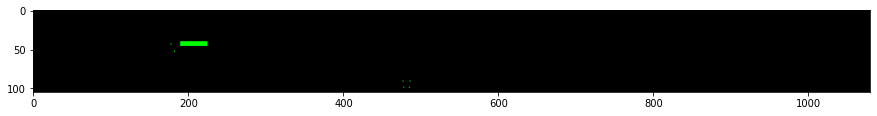

In [8]:
plt.imshow(my_img)

In [9]:
# Sort the recorded x-coordinates in ascending order
rcord = sorted(rcord)
print(rcord)

[177, 178, 182, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 477, 478, 485, 486]


In [10]:
def srcTarget(rcord):
    prev=rcord[0]
    for i in rcord:
        # Check if the absolute difference between the current and previous x-coordinates is greater than 10
        if abs(i-prev) > 10:
            # Return the current and previous x-coordinates as source and target points respectively
            # Add 5 to the previous x-coordinate to roughly compensate for the extra distance where the stick rises
            return i, prev + 5    
        prev=i

In [11]:
target, src = srcTarget(rcord)
print(src,target)

229 477


In [12]:
dist = abs(src-target)
rate = 1.045* (screen_width/1080)
print(rate)
time = str(int(dist/rate))

print(dist,time)

1.045
248 237


In [13]:
# Fix some x and y coordinates to swipe on the screen, with time already calculated before
x = str(int(np.ceil(530*yf)))
y = str(int(np.ceil(830*xf)))

os.system('adb shell input touchscreen swipe ' + x + ' ' + x + ' ' + y + ' ' + y + ' ' + time)
pause.seconds(3)

229 837
608 580
229 597
368 351
229 717
488 465
194 1029
835 797
142 773
631 602
218 789
571 545
150 878
728 694
219 797
578 551
133 469
336 320
171 397
226 215
133 709
576 549
153 557
404 385
222 613
391 373
181 749
568 542
143 629
486 463
145 477
332 316
134 501
367 350
182 389
207 197
175 509
334 318
162 437
275 262
142 765
623 594
127 389
262 250
161 661
500 477
223 773
550 525
165 885
720 687
173 605
432 412
198 389
191 182
169 917
748 714
138 869
731 697
191 941
750 715
193 933
740 706
202 381
179 170
207 766
559 533
174 877
703 671
182 797
615 587
191 677
486 463
134 1005
871 831
163 437
274 261
127 469
342 326
160 941
781 745
153 902
749 715
149 573
424 404
193 1005
812 775
127 918
791 755
130 934
804 767
197 605
408 389
193 709
516 492
145 477
332 316
137 925
788 752
173 982
809 772
147 885
738 704
126 389
263 251
181 957
776 740
133 453
320 305
221 709
488 465
210 677
467 445
197 517
320 305
129 446
317 302
229 349
120 114
210 853
643 613
209 549
340 324
161 997
836 798
173 7

IndexError: list index out of range

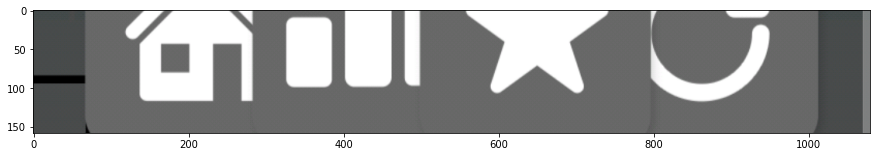

In [15]:
rate = 0.51

while True:

    os.system('adb shell screencap -p /sdcard/screencap.png')
    os.system('adb pull /sdcard/screencap.png')

    img = cv2.imread('screencap.png')
    screen_height, screen_width, _ = img.shape

    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

    yf, xf, zf = np.shape(img)
    yf = yf/2280
    xf = xf/1080
    
    img_crop = img[int(np.floor(1550*yf)):int(np.floor(1700*yf)), :]
    plt.imshow(img_crop)
    y_crop, x_crop, z_crop = np.shape(img_crop)

    my_img = np.zeros_like(img_crop)

    rcord=set()
    
    for j in range(y_crop):
        for k in range(x_crop):
            if(((img_crop[j,k,0]==255) and (img_crop[j,k,1]==0) and (img_crop[j,k,2]==0)) or ((img_crop[j,k,0]==247) and (img_crop[j,k,1]==27) and (img_crop[j,k,2]==27))):
                my_img[j,k,0] = 0
                my_img[j,k,1] = 255
                my_img[j,k,2] = 0
                rcord.add(k)  

    rcord = sorted(rcord)
    target, src = srcTarget(rcord)
    print(src,target)
    
    dist = abs(src-target)
    rate = 1.0475 * (screen_width/1080)
    time = str(int(dist/rate))
    
    print(dist,time)

    x = str(int(np.ceil(530*yf)))
    y = str(int(np.ceil(830*xf)))

    os.system('adb shell input touchscreen swipe ' + x + ' ' + x + ' ' + y + ' ' + y + ' ' + time)
    pause.seconds(3)